/Users/evogytis/Documents/manuscripts/narna-double-synonyms/data/ZhejiangMosquitoVirus3_Robin_candidate_rev.fasta Robin rev
/Users/evogytis/Documents/manuscripts/narna-double-synonyms/data/ZhejiangMosquitoVirus3_RdRp_fwd.fasta RdRp fwd
/Users/evogytis/Documents/manuscripts/narna-double-synonyms/data/Culex_narnavirus_1_Robin_rev.fasta Robin rev
/Users/evogytis/Documents/manuscripts/narna-double-synonyms/data/Culex_narnavirus_1_RdRp_rev.fasta RdRp rev
/Users/evogytis/Documents/manuscripts/narna-double-synonyms/data/Culex_narnavirus_1_RdRp_fwd.fasta RdRp fwd
/Users/evogytis/Documents/manuscripts/narna-double-synonyms/data/Culex_narnavirus_1_Robin_fwd.fasta Robin fwd
/Users/evogytis/Documents/manuscripts/narna-double-synonyms/data/ZhejiangMosquitoVirus3_RdRp_rev.fasta RdRp rev
/Users/evogytis/Documents/manuscripts/narna-double-synonyms/data/ZhejiangMosquitoVirus3_Robin_candidate_fwd.fasta Robin fwd
3101 3225 816 912


<ipython-input-1-997381ff9e4c>:85: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot(gs[v,s])


CxNV1 RdRp fwd 302 573 60
CxNV1 RdRp rev 796 77 60
CxNV1 Robin fwd 228 111 3
CxNV1 Robin rev 277 64 3
ZhMV3 RdRp fwd 72 150 20
ZhMV3 RdRp rev 191 30 20
ZhMV3 Robin fwd 74 42 5
ZhMV3 Robin rev 86 24 4


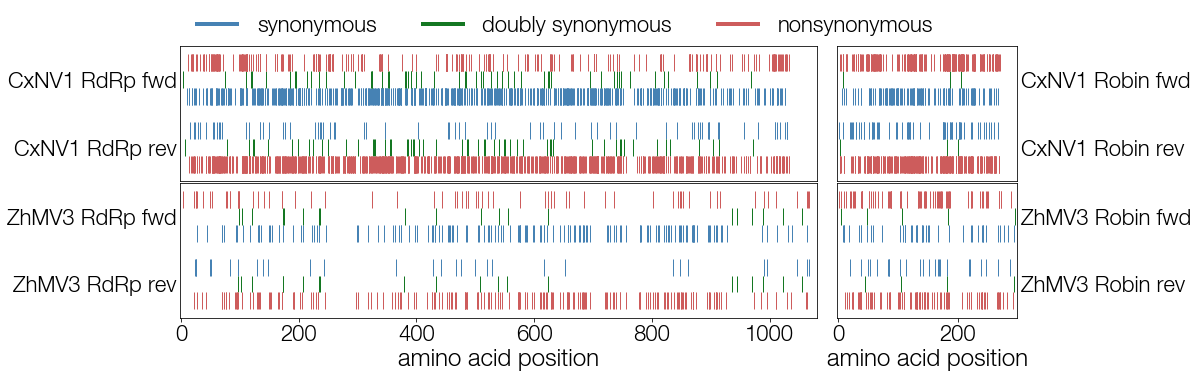

In [1]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
# import matplotlib.patheffects as path_effects

import numpy as np

typeface='Helvetica Neue'
mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=22
mpl.rcParams['pdf.fonttype']=42

from Bio import SeqIO
import glob,os
from collections import Counter

base_path='/Users/evogytis/Documents/manuscripts/narna-double-synonyms/data'

seqs={}

seqs['CxNV1']={'RdRp': {'fwd': {}, 'rev': {}}, 
               'Robin': {'fwd': {}, 'rev': {}}}

seqs['ZhMV3']={'RdRp': {'fwd': {}, 'rev': {}}, 
               'Robin': {'fwd': {}, 'rev': {}}}


for fname in glob.glob(os.path.join(base_path,'*.fasta')):
    vir='CxNV1' if 'Culex' in fname else 'ZhMV3'
    
    seg='RdRp' if 'RdRp' in fname else 'Robin'
    direction='fwd' if 'fwd' in fname else 'rev'
    print(fname,seg,direction)
    
    for seq in SeqIO.parse(fname,format='fasta'):
        seqs[vir][seg][direction][seq.id]=str(seq.seq).replace('U','T')
        
CxNV1_RdRp=max(map(len,seqs['CxNV1']['RdRp']['fwd'].values()))
ZhMV3_RdRp=max(map(len,seqs['ZhMV3']['RdRp']['fwd'].values()))

CxNV1_Robin=max(map(len,seqs['CxNV1']['Robin']['fwd'].values()))
ZhMV3_Robin=max(map(len,seqs['ZhMV3']['Robin']['fwd'].values()))



print(CxNV1_RdRp,ZhMV3_RdRp,CxNV1_Robin,ZhMV3_Robin)


gencode = {
    'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
    'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
    'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
    'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
    'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
    'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
    'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
    'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
    'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
    'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
    'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
    'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
    'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
    'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
    'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
    'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W'} ## universal code


fig = plt.subplots(figsize=(15,5),facecolor='w')


gs = GridSpec(2,2,width_ratios=[max([CxNV1_RdRp,ZhMV3_RdRp]),max([CxNV1_Robin,ZhMV3_Robin])],hspace=0.01,wspace=0.05)

complement={'C': 'G', 'A': 'T', 
            'G': 'C', 'T': 'A'}

rev_complement=lambda codon: ''.join([complement[c] for c in codon[::-1]]) ## reverse complement sequence

ax=plt.subplot(gs[0])

for v,vir in enumerate(['CxNV1','ZhMV3']): ## iterate over viruses
    for s,seg in enumerate(['RdRp','Robin']): ## iterate over segments
        ax=plt.subplot(gs[v,s])
        
        for d,direction in enumerate(['fwd','rev']): ## iterate over directions
            
#             print(aln_L,list(map(len,seqs[vir][seg][direction].values())))
            aln_L=max(map(len,seqs[vir][seg][direction].values())) ## length of ORF
            
            
            aln_columns=[Counter([s[i] for s in seqs[vir][seg][direction].values() if s[i]!='N' and s[i]!='-']) for i in range(aln_L)] ## count nucleotides at each alignment position, ignore gaps and Ns
            
            consensus=''.join([col.most_common()[0][0].replace('U','T') if len(col.most_common())>0 else 'N' for col in aln_columns]) ## generate consensus by picking most common state
            
            
            nsyn=set()
            syn=set()
            dsyn=set()
            
            
            for seq in seqs[vir][seg][direction]: ## iterate over sequences
#                 print(seq,len(seqs[vir][seg][direction][seq]))
                for i in range(0,len(consensus),3): ## iterate over codons
                    seq_codon=seqs[vir][seg][direction][seq][i:i+3]
                    con_codon=consensus[i:i+3]
                    
                    if '-' not in seq_codon and 'N' not in seq_codon and '-' not in con_codon and 'N' not in con_codon and len(seq_codon)==3 and len(con_codon)==3:
                        if seq_codon!=con_codon:
                            idx=i
                            
                            if direction=='rev':
                                fwd_L=max(map(len,seqs[vir][seg]['fwd'].values()))
                                idx=fwd_L-i
#                                 print(i,idx)
                                
                            if gencode[con_codon]!=gencode[seq_codon]: ## non-synonymous
                                nsyn.add('%d_%s>%s'%(idx/3,con_codon,seq_codon))
                            
                            else: ## synonymous
                                if gencode[con_codon]==gencode[seq_codon] and gencode[rev_complement(con_codon)]==gencode[rev_complement(seq_codon)]: ## doubly synonymous
#                                     print(con_codon,rev_complement(con_codon))
                                    dsyn.add('%d_%s>%s'%(idx/3,con_codon,seq_codon))
                                else: ## singly synonymous
                                    syn.add('%d_%s>%s'%(idx/3,con_codon,seq_codon))
                        
            
            N=[int(i.split('_')[0]) for i in nsyn] ## get site in set
            S=[int(i.split('_')[0]) for i in syn]
            DS=[int(i.split('_')[0]) for i in dsyn]
            
            D=1 if direction=='fwd' else -1 ## plot higher for fwd, lower for rev
            
            label=False ## don't label legend
            if vir=='CxNV1' and seg=='RdRp' and direction=='fwd': ## unless CxNV1 RdRp fwd
                label=True ## passed onto eventplot
            
            ax.eventplot(S,lineoffsets=D,linelengths=1,linewidths=1,color='steelblue',label='synonymous' if label else '',alpha=1.0)
            ax.eventplot(DS,lineoffsets=D*2,linelengths=1,linewidths=1,color='#147722',label='doubly synonymous' if label else '',alpha=1.0)
            ax.eventplot(N,lineoffsets=D*3,linelengths=1,linewidths=1,color='indianred',label='nonsynonymous' if label else '',alpha=1.0)
            
            
            if vir=='CxNV1' and seg=='RdRp' and direction=='fwd': ## add legend, make lines thicker
                leg=ax.legend(loc=(0.01,1.01),frameon=False,ncol=3)
                for legobj in leg.legendHandles:
                    legobj.set_linewidth(4.0)
            
            if seg=='Robin': ## tick right side of plot for Robin, set x axis limits
                ax.yaxis.tick_right()
                ax.set_xlim(-1,300)
            else:
                ax.set_xlim(-1,1080)
                
                
            if vir=='CxNV1': ## no ticklabels for CxNV1, axis shared with ZhMV3
                ax.set_xticks([])
                ax.set_xticklabels([])
            else:
                ax.set_xlabel('amino acid position',size=24) ## add x axis label for ZhMV3
            
            ax.tick_params(axis='y',size=0) ## no ticks for y axis
            ax.set_yticks([-2,2])
            ax.set_yticklabels(['%s %s rev'%(vir,seg),'%s %s fwd'%(vir,seg)])
            ax.set_ylim(-4,4)
            
            print(vir,seg,direction,len(nsyn),len(syn),len(dsyn))
            
plt.savefig('/Users/evogytis/Documents/manuscripts/narna-double-synonyms/figures/narna-diversity.png',dpi=300,bbox_inches='tight')